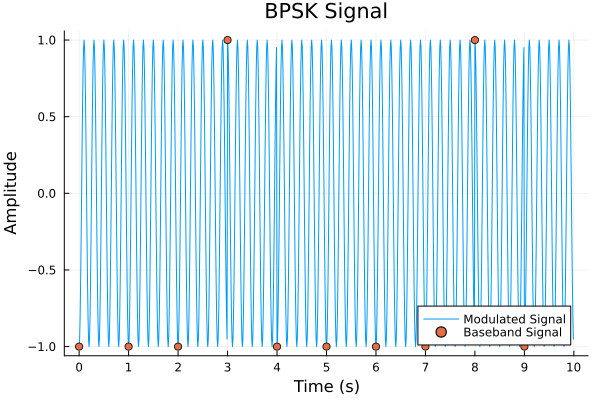

In [1]:
using Plots

# Helper function to generate a baseband signal (binary data)
function generate_baseband_signal(N)
    return rand(0:1, N)
end

# Function to modulate the baseband signal using BPSK
function bpsk_modulate(baseband_signal, fc, Fs, T)
    t = 0:1/Fs:T*length(baseband_signal)-1/Fs
    carrier = cos.(2π * fc * t)
    repeated_baseband = repeat(2 .* baseband_signal .- 1, inner=Fs*T)
    bpsk_signal = repeated_baseband .* carrier
    return t, bpsk_signal
end

# Parameters
N = 10            # Number of bits
fc = 5            # Carrier frequency (Hz)
Fs = 100          # Sampling frequency (Hz)
T = 1             # Duration of each bit (seconds)

# Generate baseband signal
baseband_signal = generate_baseband_signal(N)

# Modulate the baseband signal
t, bpsk_signal = bpsk_modulate(baseband_signal, fc, Fs, T)

# Plotting the signals
plot(t, bpsk_signal, title="BPSK Signal", label="Modulated Signal"
    , xlabel="Time (s)", ylabel="Amplitude"
    , xticks=0:T:N*T  # Set x-ticks every second
)
scatter!(t[1:Fs*T:end], (2 .* baseband_signal .- 1), label="Baseband Signal", markersize=4)


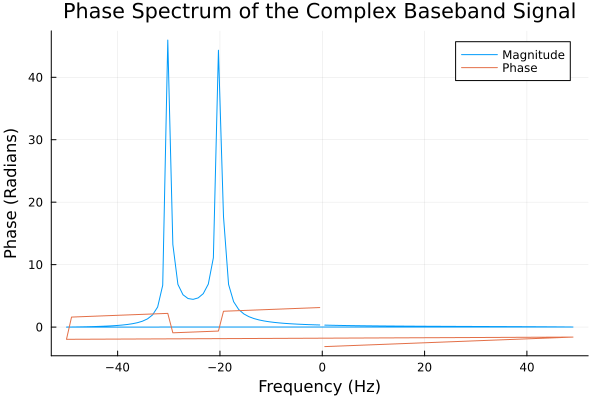

In [3]:
using Plots
using FFTW  # Package for computing Fast Fourier Transform

# Function to generate a sinusoidal signal
function generate_signal(frequency, 𝑓ₛ, duration)
    t = 0:1/𝑓ₛ:duration
    signal = sin.(2π * frequency * t)
    return t, signal
end

# Function to create a complex baseband signal by frequency modulation
function modulate_to_baseband(signal, mod_frequency, Fs)
    t = 0:1/Fs:(length(signal)-1)/Fs
    complex_signal = signal .* exp.(1im * 2π * mod_frequency * t)
    return complex_signal
end

# Function to compute the FFT and shift zero-frequency component to center
function compute_spectrum(signal, 𝑓ₛ )
    spectrum = fft(signal)
    freq = fftshift(-𝑓ₛ/2:𝑓ₛ/length(signal):𝑓ₛ/2-𝑓ₛ/length(signal))
    shifted_spectrum = fftshift(spectrum)
    return freq, shifted_spectrum
end



# Parameters
𝑓₍ = 5  # Frequency of the original sinusoidal signal (Hz)
mod_frequency = 25  # Frequency to which the signal is modulated (Hz)
𝑓ₛ = 100  # Sampling frequency (Hz)
duration = 1  # Duration of the signal in seconds

# Generate signal
t, y = generate_signal(𝑓₍, 𝑓ₛ, duration) # y signal

# Modulate signal to complex baseband
complex_signal = modulate_to_baseband(y, mod_frequency, Fs)

# Compute spectrum
freq, spectrum = compute_spectrum(complex_signal, 𝑓ₛ)

# Plotting the spectrum
plot(freq, abs.(spectrum), title="Magnitude Spectrum of the Complex Baseband Signal",
     xlabel="Frequency (Hz)", ylabel="Magnitude", label="Magnitude")
plot!(freq, angle.(spectrum), title="Phase Spectrum of the Complex Baseband Signal",
      xlabel="Frequency (Hz)", ylabel="Phase (Radians)", label="Phase", legend=:topright)
